### This is the steps fo CRISP-DM

Steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. EValuation
6. Deployment

#### Imports

In [211]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math

#### Business Questions to Find answers to

Question I want to provide answers to:
 - What are the most popular Airbnb destinations?
 - What factors influence cost of Airbnb rental costs?
 - What contributes to good Airbnb ratings?
 - Does cancelation policy affect reviews?

#### Data Understanding:

In [223]:
listings = pd.read_csv("seattle/listings.csv")
# print(listings.describe())
print("\nShape of dataset: ",listings.shape,"\n")
listings.head(3)


Shape of dataset:  (3818, 92) 



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### Data Understanding & Cleaning

In [224]:
# Calculate the threshold count for dropping columns
threshold = len(listings) * 0.7

# Replace empty and "none" values with NaN
listings_replaced = listings.replace(['', 'none'], np.nan)

# Count the number of NaN values in each column
na_counts = listings_replaced.isna().sum()

# Get the column indices where the count exceeds or equals the threshold
columns_to_drop_1 = na_counts[na_counts >= threshold].index

# Drop the columns
listings = listings_replaced.drop(columns=columns_to_drop_1)

# Get the unique value counts for each column
value_counts = listings.nunique()

# Get the column names where all values are the same
columns_to_drop_2 = value_counts[value_counts == 1].index

# Drop the columns
listings = listings.drop(columns=columns_to_drop_2)
columns_to_drop = columns_to_drop_1.to_list() + columns_to_drop_2.to_list()
print("Dropped columns are :", columns_to_drop)
print("listings shape: ", listings.shape)
listings.head(3)

Dropped columns are : ['experiences_offered', 'square_feet', 'license', 'scrape_id', 'last_scraped', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']
listings shape:  (3818, 80)


,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,"Seattle, WA",47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,Na

In [225]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print the column names
print(listings.columns)

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'gues

In [226]:
relevant_listing_cols= [
    'host_is_superhost',
    'neighbourhood_cleansed',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'is_location_exact',
    'review_scores_rating',
    'property_type',
    'room_type',
    'beds',
    'bed_type',
    'number_of_reviews',
    'instant_bookable',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_communication',
    'review_scores_value',
    'cancellation_policy'
]

len(relevant_listing_cols)

18

/var/folders/h8/n2whn8ld5zggrq_zdkp65p_00000gn/T/ipykernel_31938/3208828364.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = listings_relevant.corr()


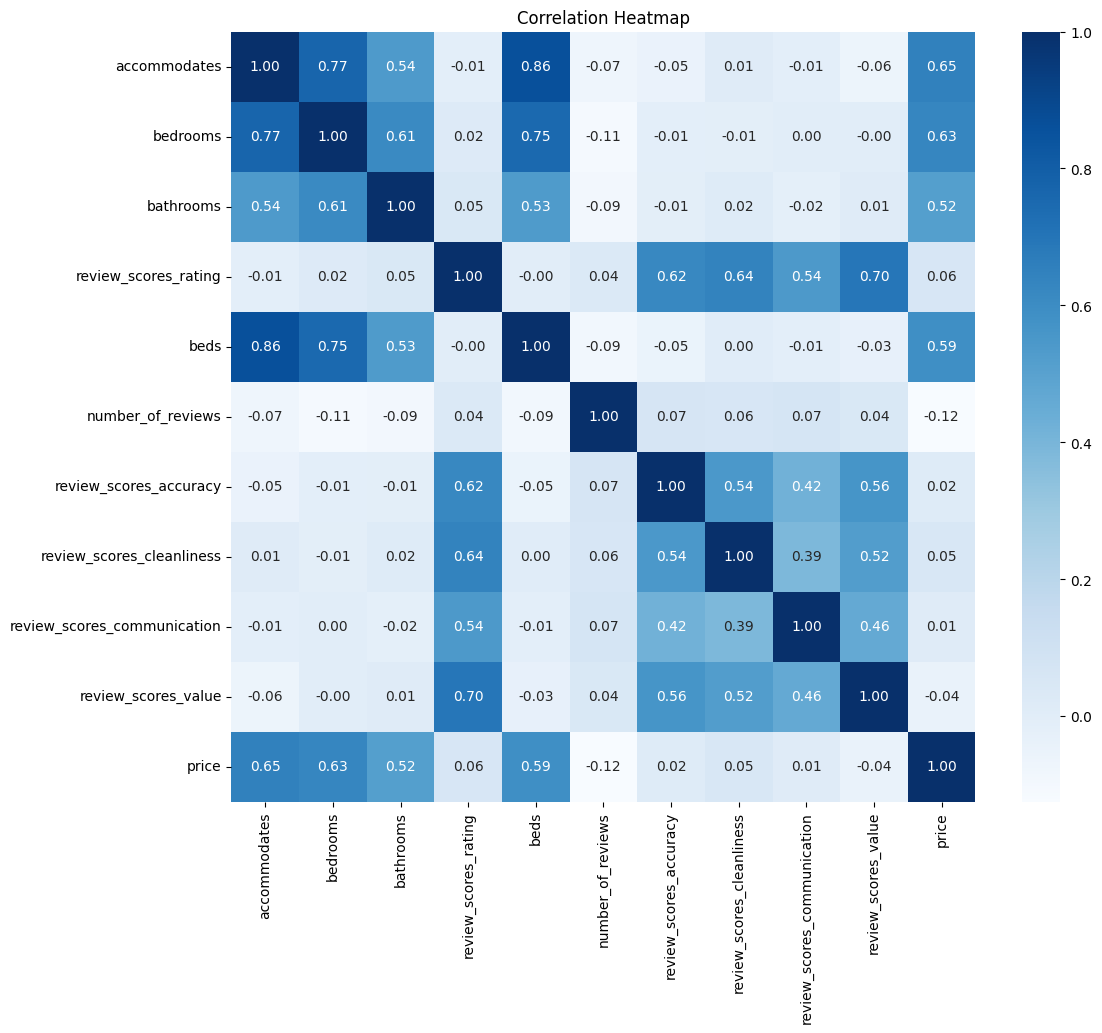

In [185]:
# Select the columns of interest, including 'price'
columns_of_interest = relevant_listing_cols + ['price']

# Subset the data to include only the columns of interest
listings_relevant = listings.loc[:, columns_of_interest]

# Remove non-numeric characters from the 'pricing' column
listings_relevant['price'] = listings_relevant['price'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x))).astype(float)

# Calculate the correlation matrix
correlation_matrix = listings_relevant.corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [186]:
correlation_matrix

,accommodates,bedrooms,bathrooms,review_scores_rating,beds,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_value,price
accommodates,1.000000,0.770974,0.538439,-0.013101,0.861119,-0.072978,-0.049665,0.011646,-0.013208,-0.062041,0.652218
bedrooms,0.770974,1.000000,0.610937,0.023257,0.753167,-0.105555,-0.011943,-0.008089,0.001113,-0.001208,0.627720
bathrooms,0.538439,0.610937,1.000000,0.045101,0.532838,-0.092147,-0.006129,0.018063,-0.016067,0.014297,0.516424
review_scores_rating,-0.013101,0.023257,0.045101,1.000000,-0.000720,0.036242,0.621257,0.642882,0.540620,0.696534,0.055551
beds,0.861119,0.753167,0.532838,-0.000720,1.000000,-0.089077,-0.052767,0.004732,-0.013373,-0.029102,0.589525
number_of_reviews,-0.072978,-0.105555,-0.092147,0.036242,-0.089077,1.000000,0.066618,0.055609,0.072957,0.044110,-0.124695
review_scores_accuracy,-0.049665,-0.011943,-0.006129,0.621257,-0.052767,0.066618,1.000000,0.543345,0.423189,0.562878,0.019026
review_scores_cleanliness,0.011646,-0.008089,0.018063,0.642882,0.004732,0.055609,0.543345,1.000000,0.388146,0.524354,0.054357
review_scores_communication,-0.013208,0.001113,-0.016067,0.540620,-0.013373,0.072957,0.423189,0.388146,1.000000,0.463772,0.012990
review_scores_value,-0.062041,-0.001208,0.014297,0.696534,-0.029102,0.044110,0.562878,0.524354,0.463772,1.000000,-0.041776


### Dealing with categorical variables & improperly represented Boolean Variables in the listings dataset:

In [188]:
# Identify columns containing 'f' or 't' values
boolean_cols = [col for col in listings_relevant if listings[col].isin(['f','t', np.nan]).all()]

# Convert 'f' to False and 't' to True in the identified columns
listings_relevant[boolean_cols] = listings_relevant[boolean_cols].replace({'f': False, 't': True})

#Remove all the nan values in the dataset and convert the True/False values to 0/1:
listings_relevant = listings_relevant.dropna(subset=[b for b in boolean_cols]).astype({b: int for b in boolean_cols})

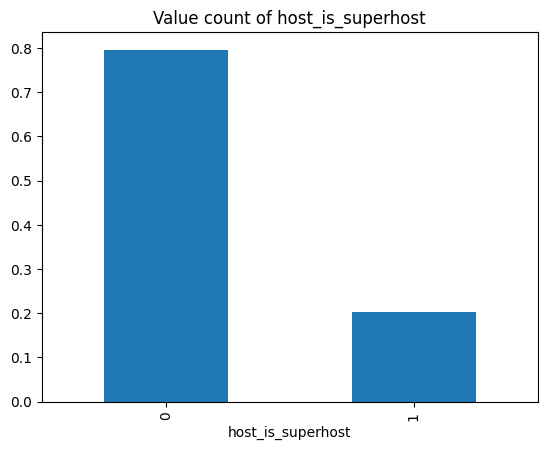

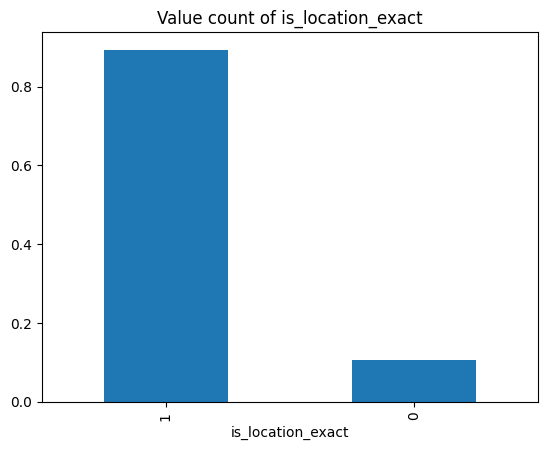

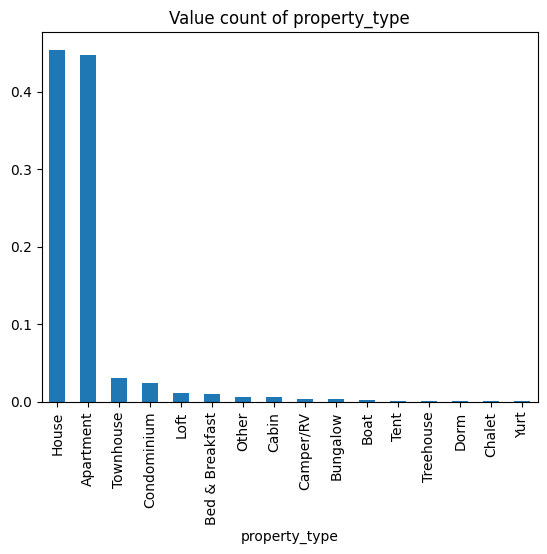

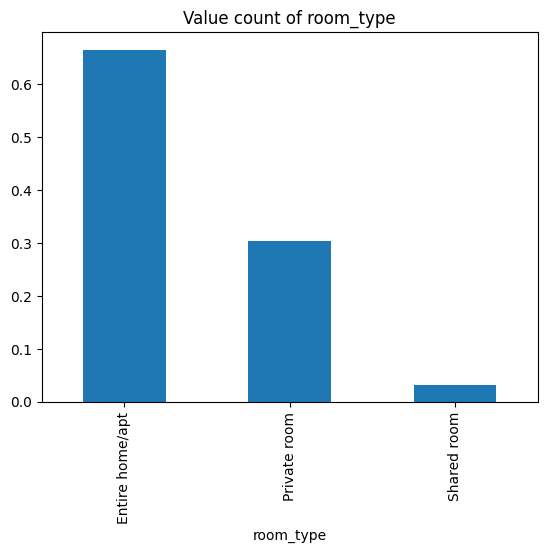

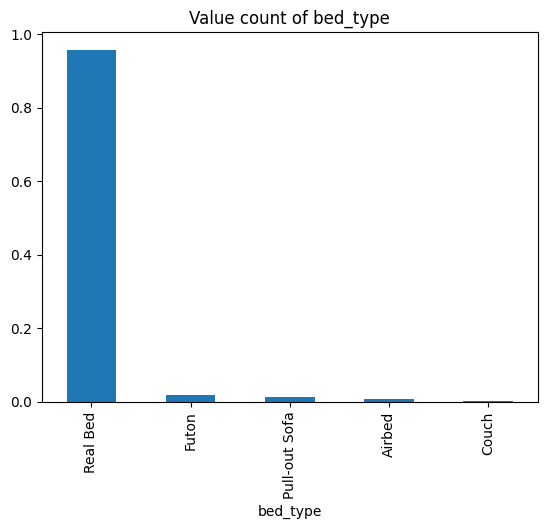

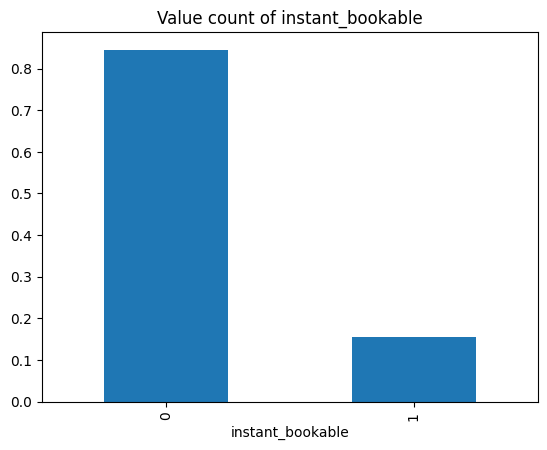

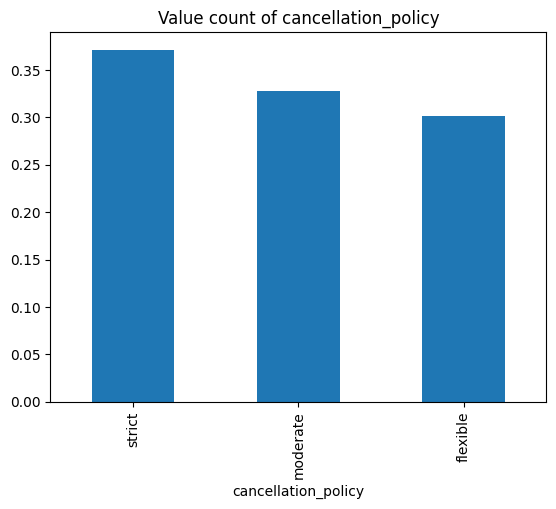

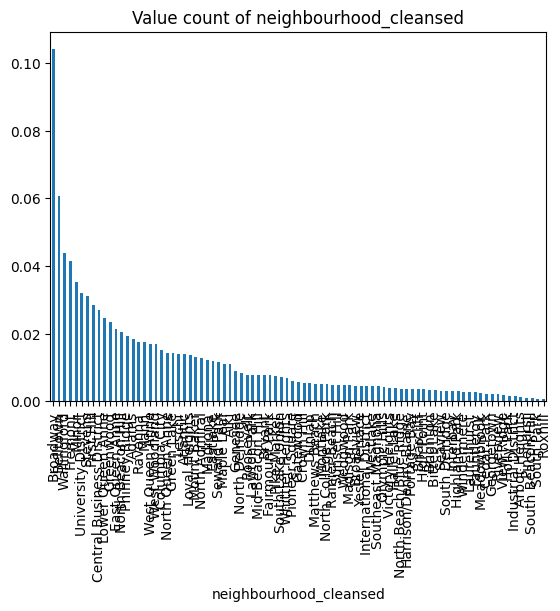

In [190]:
# Remove non-numeric characters from the 'pricing' column
listings_relevant['price'] = listings_relevant['price'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))

# Select the variables to normalize and plot against the price
variables_to_plot = ['host_is_superhost', 'is_location_exact', 'property_type',
                     'room_type', 'bed_type', 'instant_bookable', 
                     'cancellation_policy','neighbourhood_cleansed']

# Group by each column and plot against the price
for column in variables_to_plot:
    status_city = listings_relevant[column].value_counts()
    (status_city/listings_relevant.shape[0]).plot(kind="bar");
    plt.xlabel(column)
    plt.title(f'Value count of {column}')
    plt.show()

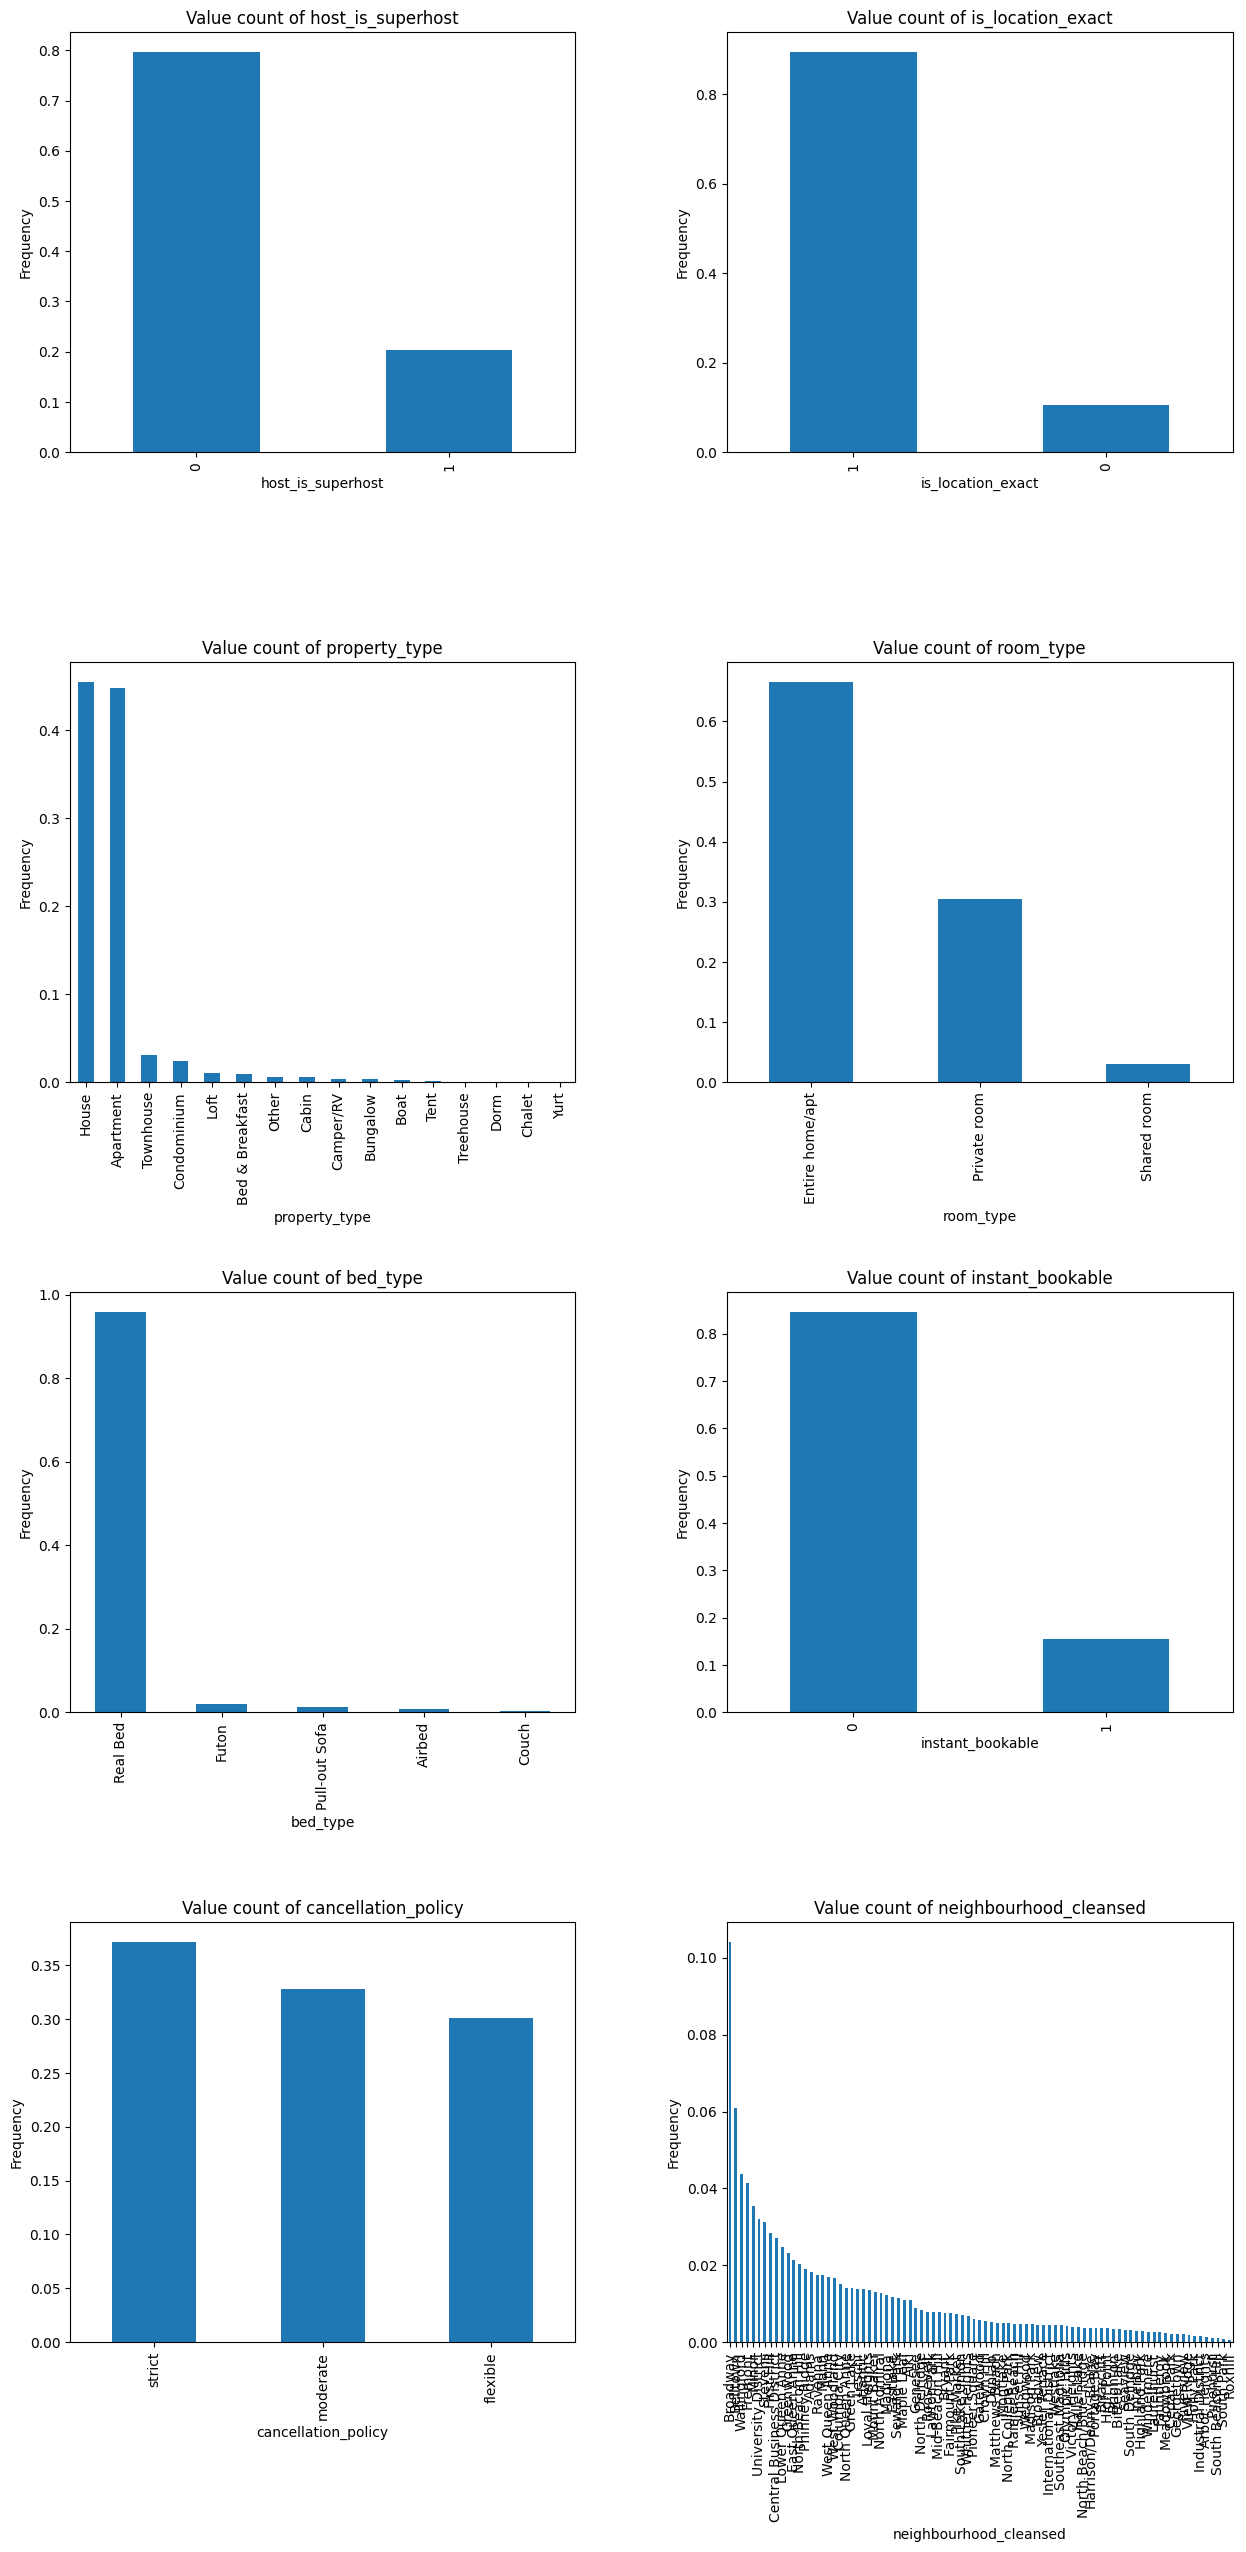

In [204]:
# Remove non-numeric characters from the 'price' column
listings_relevant['price'] = listings_relevant['price'].apply(lambda x: re.sub(r'[^\d.]+', '', str(x)))

# Select the variables to normalize and plot against the price
variables_to_plot = ['host_is_superhost', 'is_location_exact', 'property_type',
                     'room_type', 'bed_type', 'instant_bookable',
                     'cancellation_policy', 'neighbourhood_cleansed']

# Calculate the number of rows and columns for the subplots
n_plots = len(variables_to_plot)
n_rows = math.ceil(n_plots / 2)
n_cols = 2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30))

# Iterate over the variables and create the subplots
for i, column in enumerate(variables_to_plot):
    row = i // n_cols
    col = i % n_cols

    # Plot the value counts
    status_city = listings_relevant[column].value_counts()
    (status_city / listings_relevant.shape[0]).plot(kind="bar", ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Value count of {column}')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase the spacing between subplots

# Show the plots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


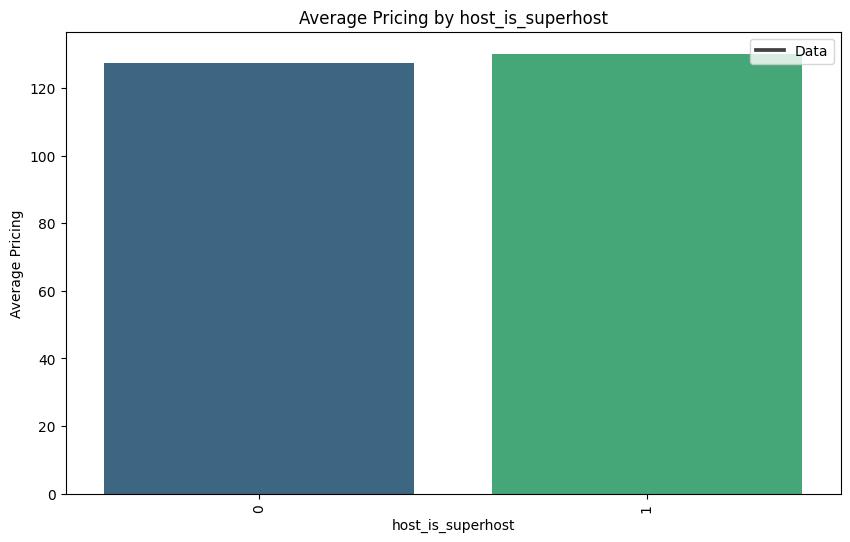

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


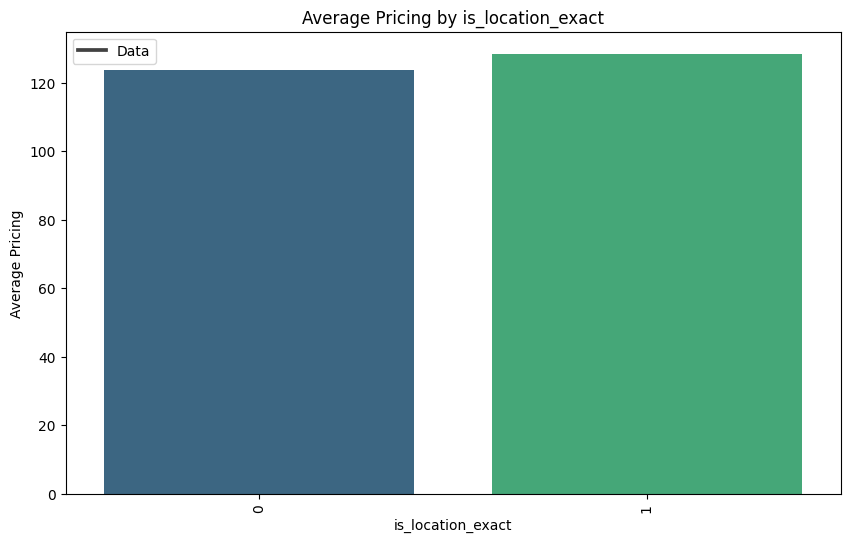

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


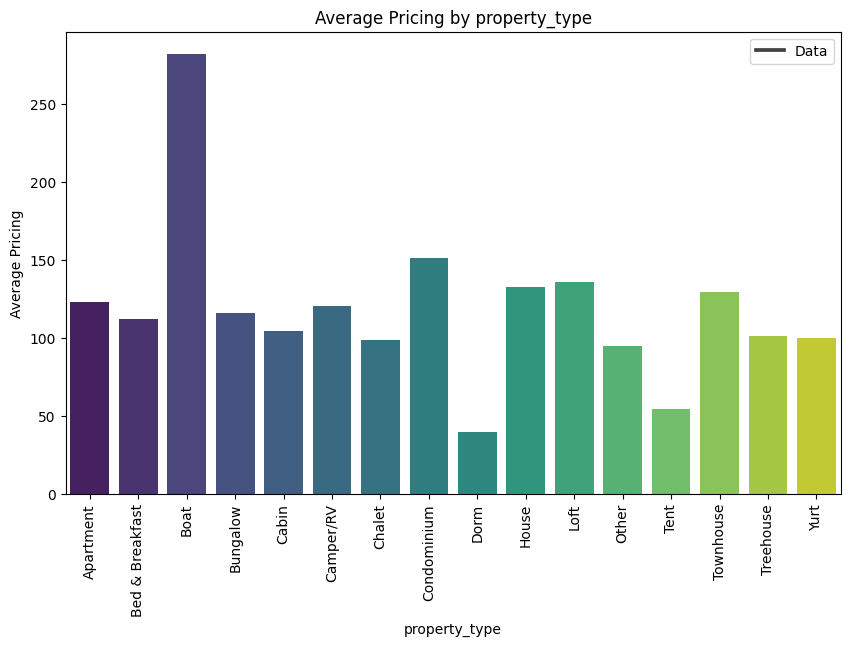

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


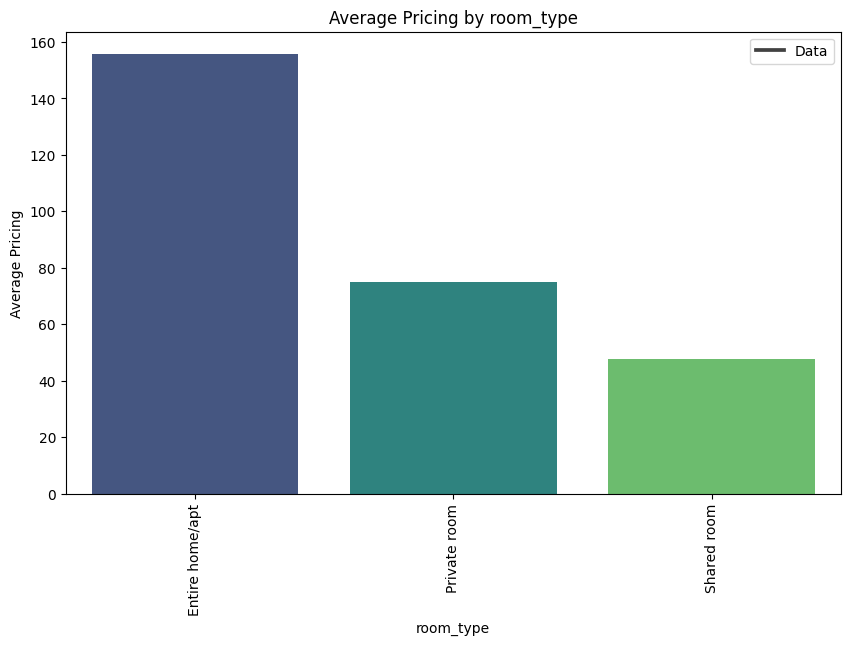

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


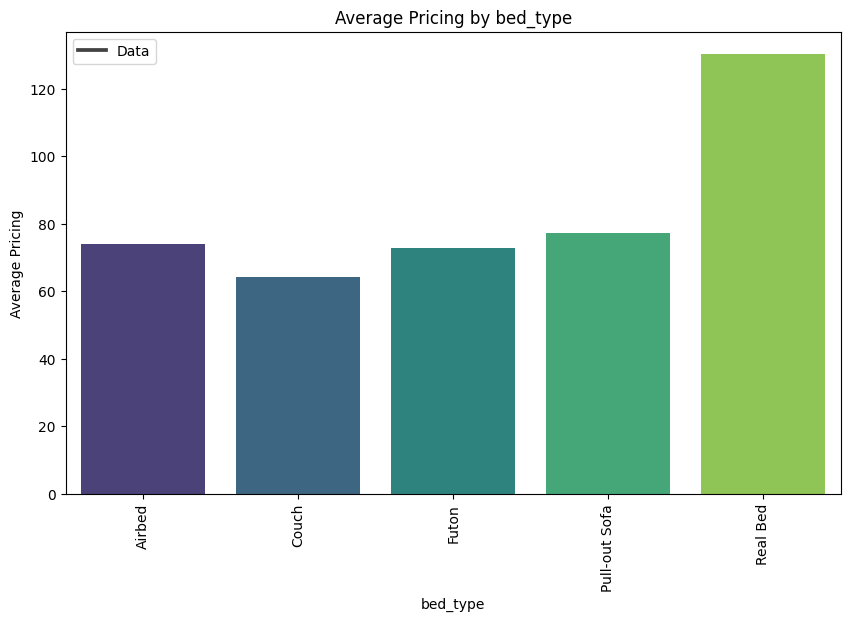

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


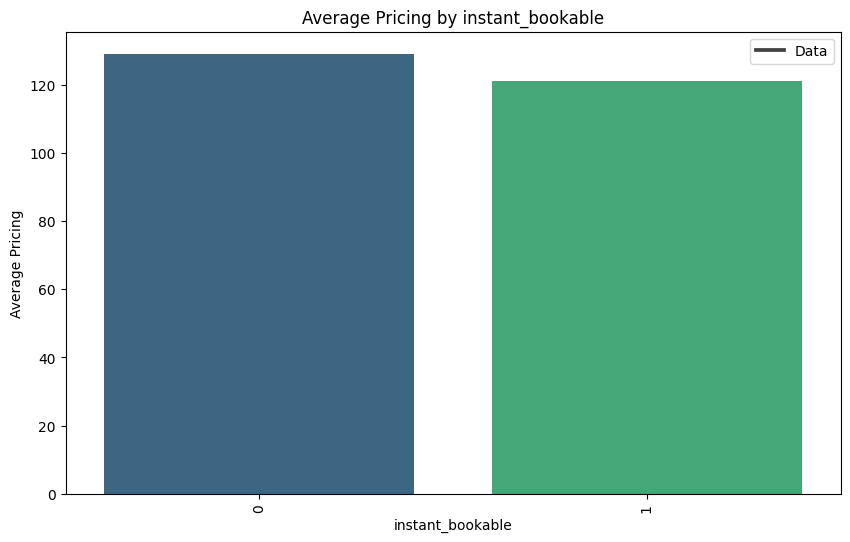

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


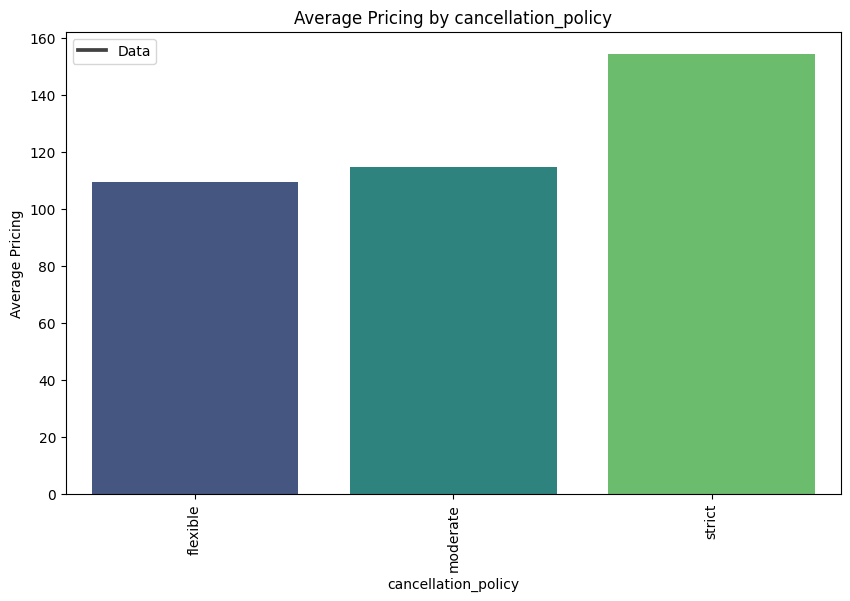

In [170]:
# Convert the 'price' column to float
listings_relevant['price'] = listings_relevant['price'].astype(float)
# Define the columns to group by
group_by_columns = ['host_is_superhost', 'is_location_exact', 'property_type',
'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']

for col in group_by_columns:

    # Group the data by the specified columns and calculate the average pricing
    grouped_data = listings_relevant.groupby(col)['price'].mean()

    # Reset the index to flatten the grouped data
    grouped_data = grouped_data.reset_index()

    # Plot the grouped data
    plt.figure(figsize=(10, 6))
    sns.barplot(data=grouped_data, x=col, y='price', palette='viridis')
    plt.xlabel(f'{col}')
    plt.ylabel('Average Pricing')
    plt.title(f'Average Pricing by {col}')
    plt.legend(title= f'Pricing based on {col} grouping')
    plt.legend(labels=['Data'])


    # Get the x-axis tick labels
    x_ticks_labels = plt.gca().get_xticklabels()
    # Slant the x-axis tick labels by the specified angle
    plt.gca().set_xticklabels(x_ticks_labels, rotation=90)
    plt.show()


In [156]:
type(listings_relevant['price'].astype(float))

pandas.core.series.Series

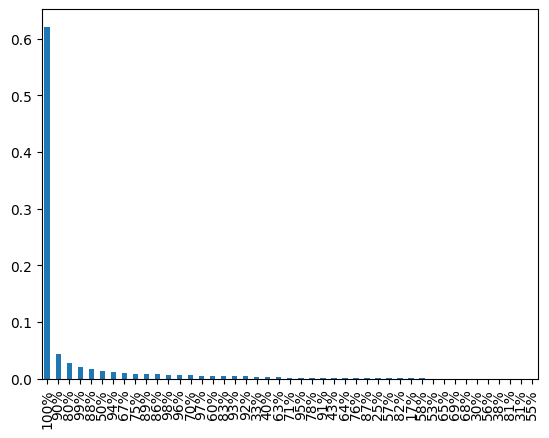

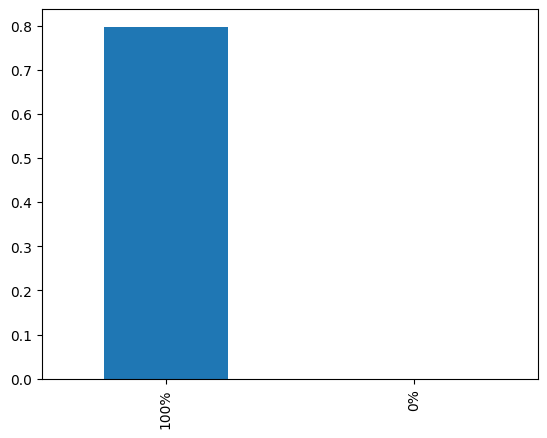

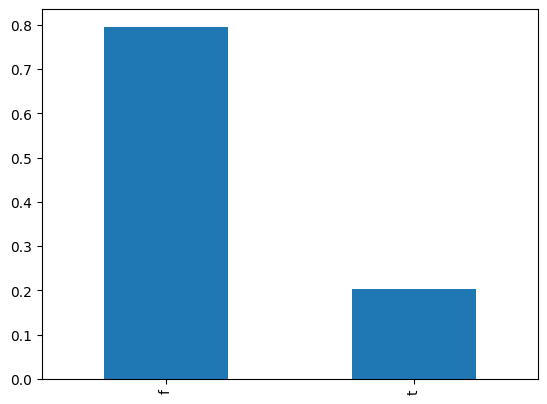

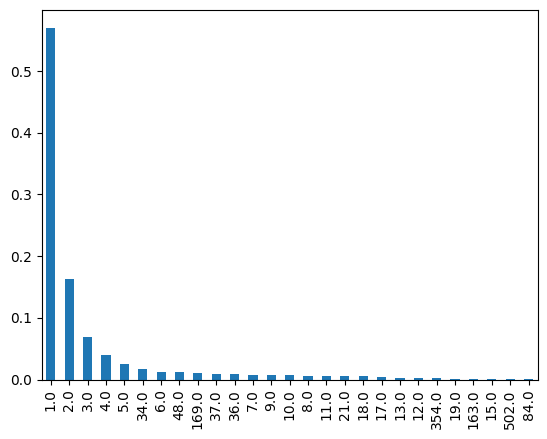

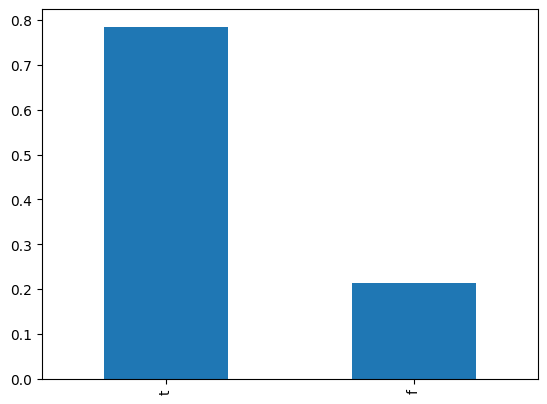

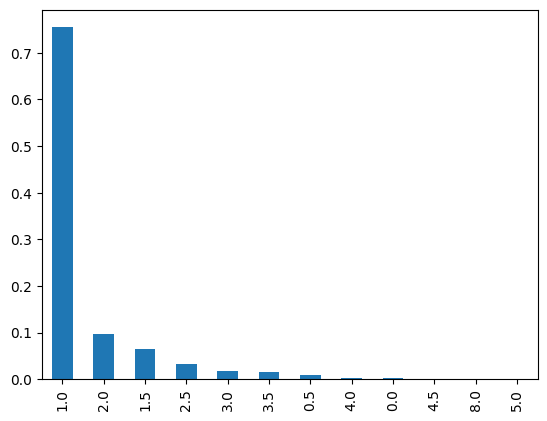

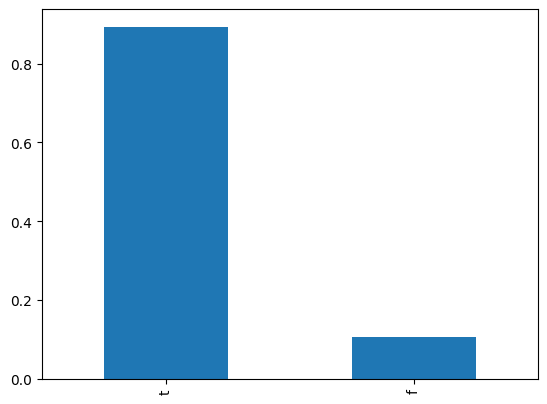

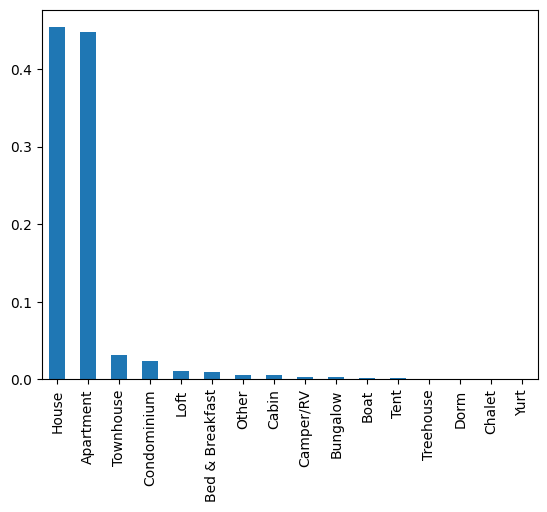

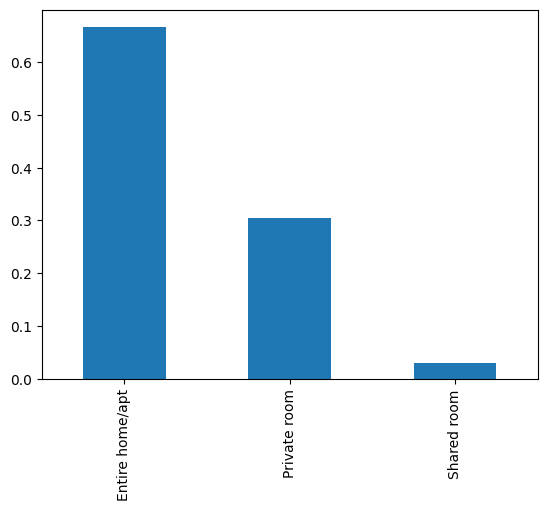

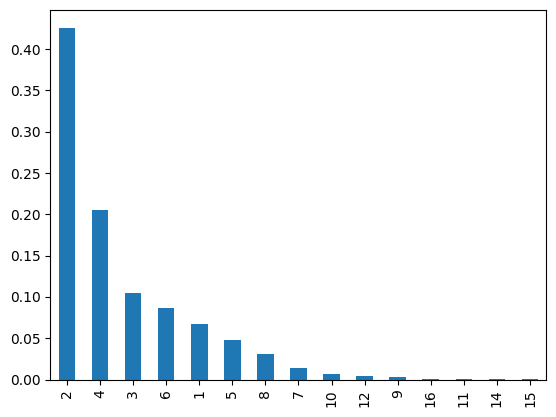

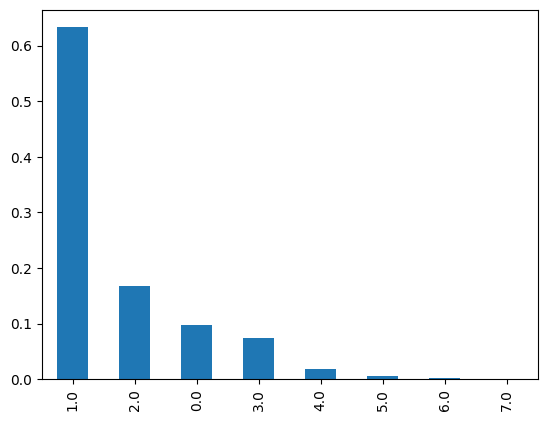

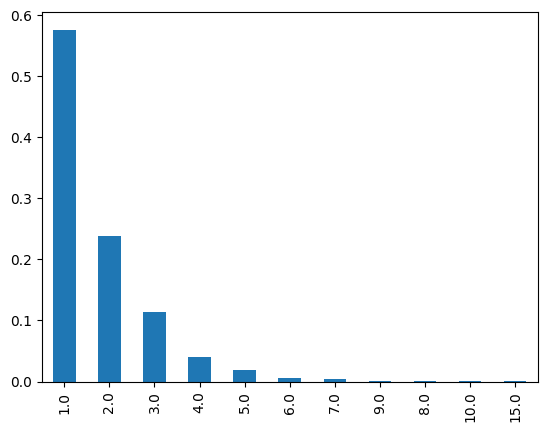

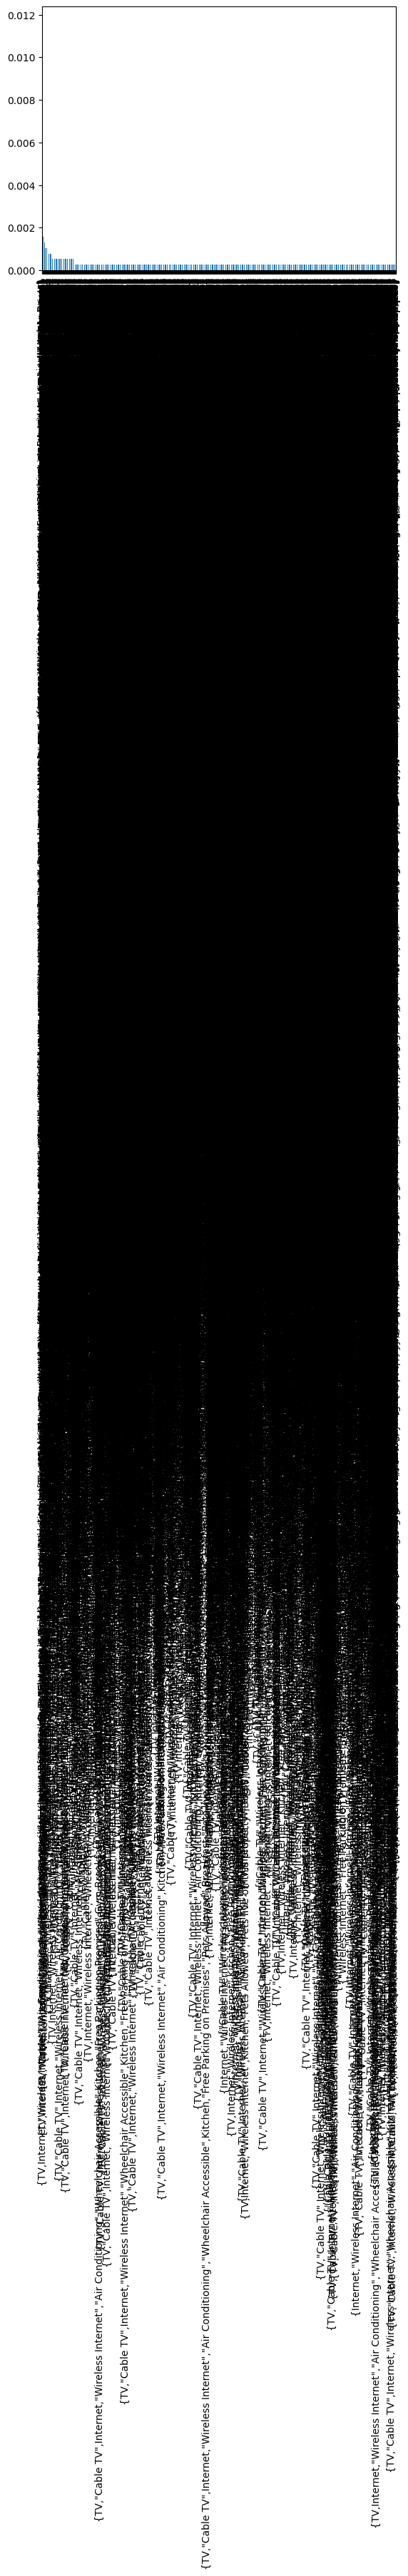

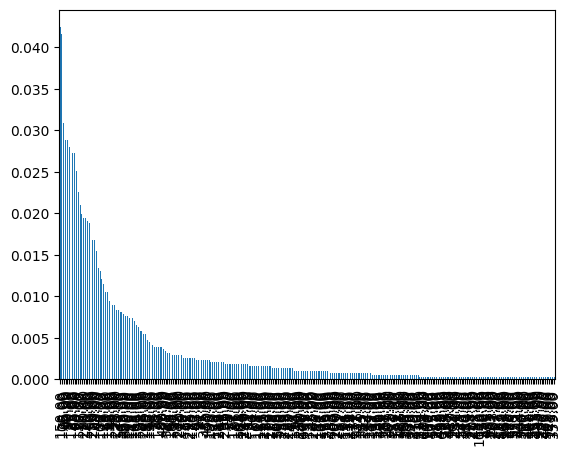

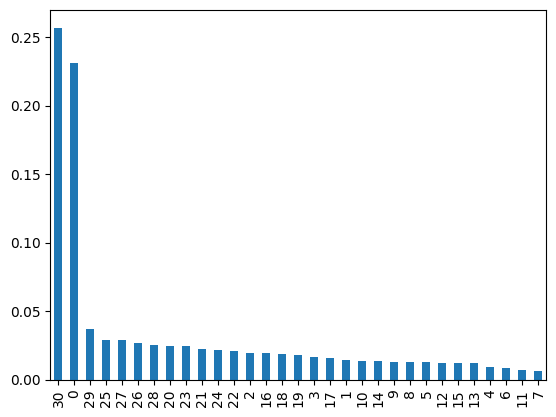

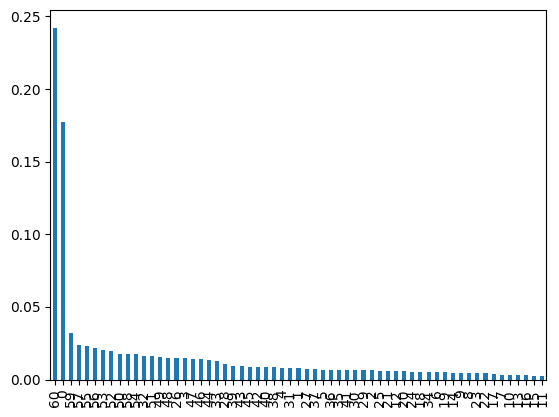

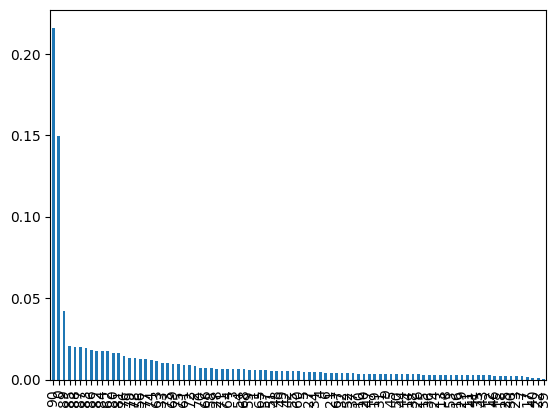

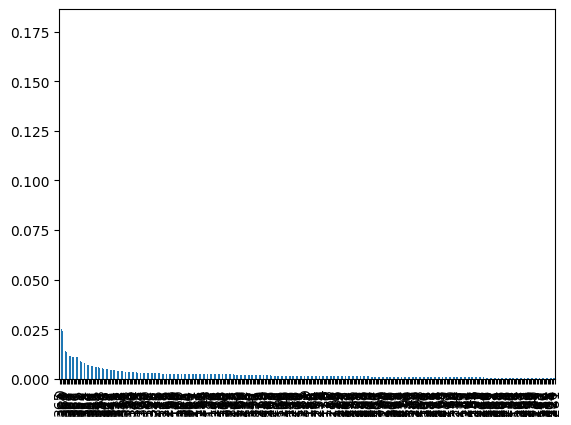

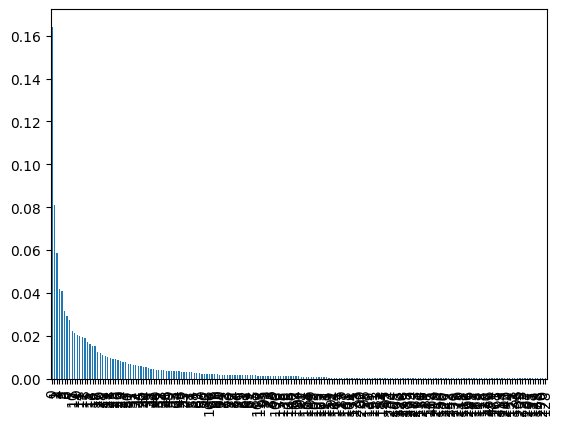

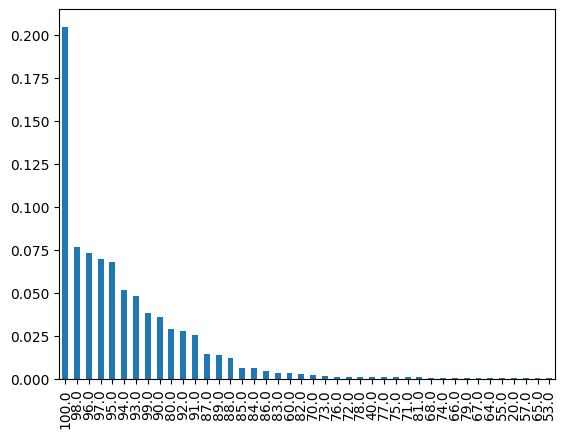

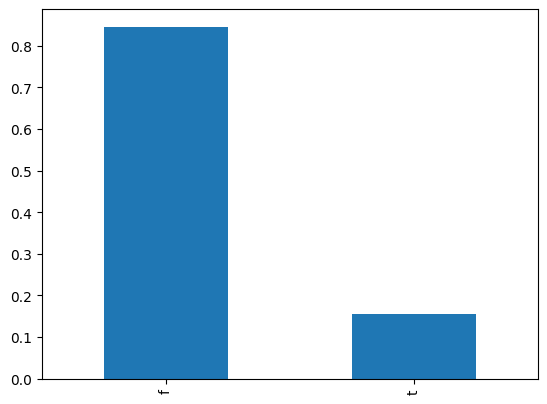

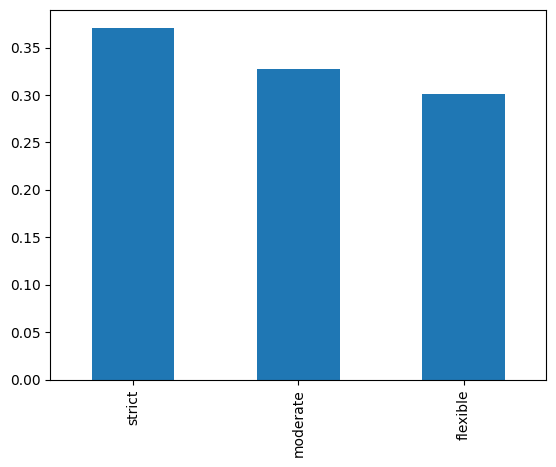

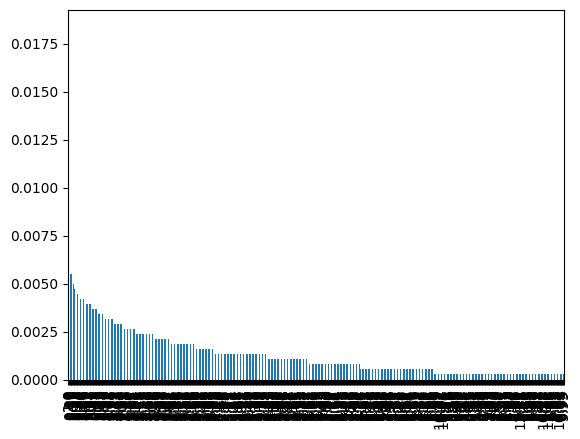

In [87]:
for col in listings_relevant:
    status_city = listings_relevant[col].value_counts()
    (status_city/listings_relevant.shape[0]).plot(kind="bar");
    plt.show()

In [ ]:
sum(listings_relevant['review_scores_value'].isna())

In [ ]:
listings_relevant['city'].unique()

In [ ]:
listings_relevant['host_is_superhost'].unique()

In [ ]:
print("\n".join([f"{column} : {listings_relevant[column].nunique()}" for column in listings_relevant.select_dtypes(exclude=['int']).columns]))

In [ ]:
sum(listings_relevant['host_acceptance_rate'].isna())

In [ ]:
listings_relevant

In [ ]:
# Step 4: Standardize numeric columns
numeric_columns = listings_relevant.select_dtypes(include=['float', 'int']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numeric columns
listings_relevant[numeric_columns] = scaler.fit_transform(listings_relevant[numeric_columns])

In [ ]:
listings_relevant

In [ ]:
reviews = pd.read_csv("seattle/reviews.csv")
reviews.head()

In [ ]:
calendar = pd.read_csv("seattle/calendar.csv")
calendar.head(3)

In [ ]:
merged_1 = pd.merge(reviews, calendar, on='listing_id')
merged_1.head()

Only an approximation of 33% of the pricing dataset is Nan. We can exclude this from the dataset and make use with the remaining 67%. <br/> <br/>
The remaining columns in the calendar file do not have Nan values. However, there is common column names "date" in the calendar csv file and the reviews csv file. You may one to rename both as they do not represent the same kind of date.

In [ ]:
print(calendar['price'].isna().sum()/calendar.shape[0])
# Removing Nans from the pricing column:
calendar = calendar.dropna().reindex()
calendar.head(3)